# 변수 변환 기법 실습

In [2]:
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler    # min-max 스케일링
from sklearn.preprocessing import StandardScaler  # 표준화
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# os에 따른 Font 깨짐 제거를 위해 Font 지정
import os
if os.name == 'nt' :          # Windows OS
    font_family = "Malgun Gothic"
else:                         # MAC OS
    font_family = "AppleGothic"
    
# '-' 값이 깨지는 문제 해결을 위해 파라미터값 설정
sns.set(font=font_family, rc={"axes.unicode_minus" : False})

### 데이터셋 준비
- 타이타닉 데이터넷
    * kaggle - 타이타닉 생존자 분석
    * https://www.kaggle.com/c/titanic/
- 캐글에서 타이타닉 데이터 다운로드
- 다운로드 경로
    * train data: data/titanic/train.data
    * test data: data/titanic/test.data

### 데이터 Read를 위한 경로 확인

In [3]:
# 현재 경로 확인
os.chdir('C:/Users/user/Bigdata2022')
os.getcwd()

'C:\\Users\\user\\Bigdata2022'

In [4]:
# 폴더 및 파일 리스트 확인
os.listdir()

['.ipynb_checkpoints',
 '005930.KS.csv',
 'array.npy',
 'CARD_SUBWAY_MONTH_202102.csv',
 'Class1_June_23.ipynb',
 'Class2_June_24.ipynb',
 'Class2_June_24_실습-삼성전자주가데이터.ipynb',
 'Class8_July_4_Data_Vectorization.ipynb',
 'Class8_July_4_Missing_Value.ipynb',
 'Class8_July_4_Outlier.ipynb',
 'Class8_July_4_Variable_Selection.ipynb',
 'Class9_July_5_Derived_Variance.ipynb',
 'Class9_July_5_Dimensionality_Reduction.ipynb',
 'Class9_July_5_Imbalanced_Data.ipynb',
 'Class9_July_5_Variable_Transformation.ipynb',
 'data',
 'dataframe.csv',
 'DesignThinking_Workshop_2.jpeg',
 'DesignThinking_Workshop_3.jpeg',
 'test_dataframe.csv']

In [5]:
# 경로 설정
os.chdir('data/titanic')

In [6]:
# 폴더 및 파일리스트 확인
os.listdir()

['gender_submission.csv', 'test.csv', 'train.csv']

#### 데이터셋 준비

In [7]:
# Read data
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

# 리스트 형태 데이터 병합
train_test_data = [train, test]

print(type(train_test_data))
print(type(train))

<class 'list'>
<class 'pandas.core.frame.DataFrame'>


## 변수 변환 : log 변환

In [8]:
# Copy data
data = train.copy()

# 데이터셋 shape 확인
print(data.shape)

# 범주형 변수 기술 통계 정보 확인
data.describe(include=object)     # None : 수치 데이터, object : object type

(891, 12)


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [9]:
# 수치형 변수 기술 통계 정보 확인
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
# 연속형 변수 속성 추출
numerical_feats = data.dtypes[data.dtypes == "int64"].index
numerical_feats = numerical_feats.append(data.dtypes[data.dtypes == "float64"].index)
print("연속형 변수 카운트 : ", len(numerical_feats))

연속형 변수 카운트 :  7


In [12]:
numerical_feats

Index(['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare'], dtype='object')

#### 왜도와 첨도
* 왜도 (Skewness) : 자료 분포의 모양이 좌, 우 어느 쪽으로 얼마만큼 기울어져 있는가의 비대칭성 (Asymmetry) 정도를 나타내는 통계량
* 첨도 (Kurtosis) : 자료의 분포가 중식에서 어느 정도 몰려 있는가를 측정할 때 사용하는 통계량

In [13]:
# 연속형 변수의 왜도와 침도 확인
for col in numerical_feats:
    print('{:15}'.format(col),
         'Skewness: {:05.2f}'.format(data[col].skew()),
         ' ', 'Kurtosis: {:06.2f}'.format(data[col].kurt())
         )

PassengerId     Skewness: 00.00   Kurtosis: -01.20
Survived        Skewness: 00.48   Kurtosis: -01.78
Pclass          Skewness: -0.63   Kurtosis: -01.28
SibSp           Skewness: 03.70   Kurtosis: 017.88
Parch           Skewness: 02.75   Kurtosis: 009.78
Age             Skewness: 00.39   Kurtosis: 000.18
Fare            Skewness: 04.79   Kurtosis: 033.40


<AxesSubplot:xlabel='Fare', ylabel='Density'>

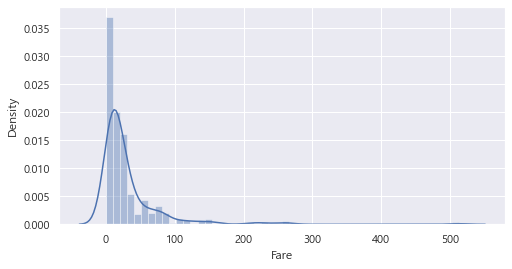

In [14]:
# 왜도가 큰 'Fare' 변수의 분포 확인
f, ax = plt.subplots(figsize = (8,4))

sns.distplot(data["Fare"])

Skewness: 0.395
Kurtosis: 0.976


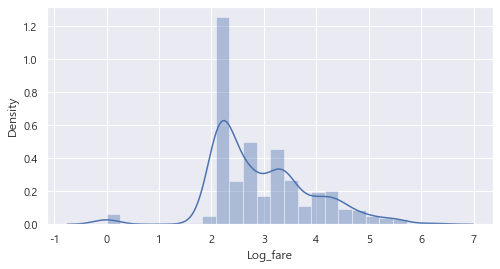

In [15]:
# 로그 변환 수행
# np.log()가 아닌 np.log1p() 사용, 변환 전의 값이 작으면 컴퓨터 계산 오류 발생
data["Log_fare"] = np.log1p(data["Fare"])

f, ax = plt.subplots(figsize = (8,4))
sns.distplot(data["Log_fare"])

print("Skewness: {:.3f}".format(data["Log_fare"].skew()))
print("Kurtosis: {:.3f}".format(data["Log_fare"].kurt()))

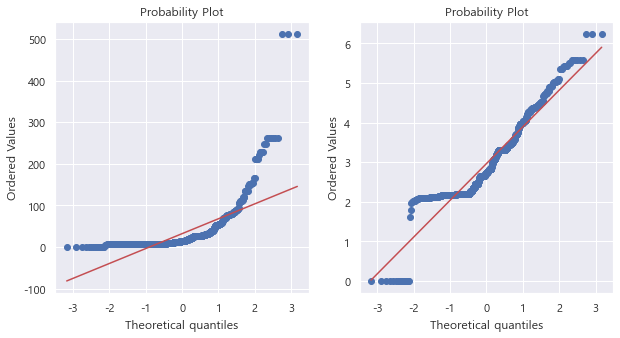

In [16]:
# QQ-Plot으로 정규성 검정
fig = plt.figure(figsize = (10,5))

fig.add_subplot(1,2,1)
res = stats.probplot(data['Fare'], plot=plt)

fig.add_subplot(1,2,2)
res = stats.probplot(data['Log_fare'], plot=plt)

# 로그 변환 후 우측 그림처럼 빨간선에 가깝게 데이터 분포가 구성된 것 확인

## 변수 변환 : Min-Max 정규화

In [17]:
# 데이터 확인
# train_test_data[0] : train_data, train_test_data[1] : Test Data
train_test_data[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
# Mr, Miss 값이 저장된 파생변수 생성
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([\w]+)\.', expand=False)
    
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].apply(lambda x : 0 if x == "Mr" else 1 
                                              if x == "Miss" else 2 if x == "Mrs" else 3
                                              if x == "Master" else 4)
    
# 결측치(결측값) 제거
for dataset in train_test_data:
    dataset['Age'].fillna(dataset.groupby("Title")["Age"].transform("median"),
                         inplace=True)

In [19]:
# Min-Max 정규화
scaler = MinMaxScaler()

for dataset in train_test_data:
    array = dataset['Age'].values.reshape(-1,1)       # 2D array로 변환
    scaler.fit(array)                                 # 스케일링에 필요한 값(최소값, range 등) 계산
    dataset['AgeScale'] = pd.Series(scaler.transform(array).reshape(-1))
                                                      # 스케일링 후 series로 추가
        
# AgeScale 변수 확인
train_test_data[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeScale
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0.271174
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0.472229
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0.321438
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0.434531
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0.434531


In [20]:
# Min Max 정규화 전 Age 변수의 min, max 값
print(train["Age"].min())
print(train["Age"].max())
print('    ')

# Min-Max 정규화 후 Agescale 변수의 min, max값
print(train["AgeScale"].min())
print(train["AgeScale"].max())

0.42
80.0
    
0.0
1.0


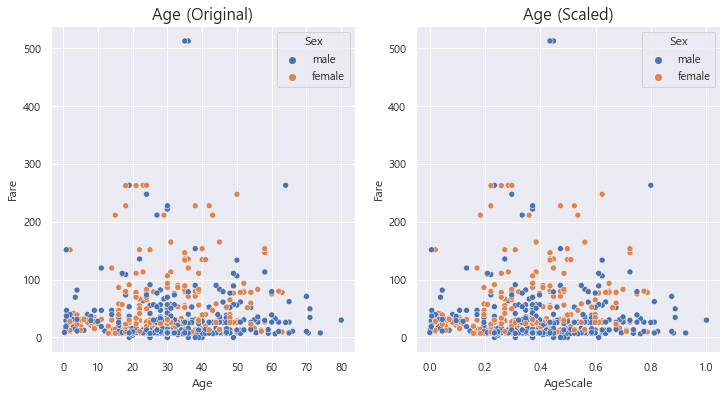

In [21]:
# Min-Max 정규화 전, 후 age 속성과 AgeScale 속성의 산점도 비교
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
scatter_plot = sns.scatterplot(x='Age', y='Fare', hue = 'Sex', data=train)
plt.title('Age (Original)', fontsize=16)

plt.subplot(1,2,2)
scatter_plot = sns.scatterplot(x='AgeScale', y='Fare', hue='Sex', data=train)
plt.title('Age (Scaled)', fontsize=16)
plt.show()

## 표준화 (Standardization)

In [22]:
# 데이터 확인
# train_test_data[0] : train data, train_test_data[1] : Test Data
train_test_data[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeScale
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0.271174
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0.472229
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0.321438
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0.434531
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0.434531


In [23]:
# 결측값 중앙값으로 대체
for dataset in train_test_data:
    dataset["Fare"].fillna(dataset.groupby("Pclass")["Fare"].transform("median"),
                          inplace=True)

# 표준화 수행
scaler = StandardScaler()

for dataset in train_test_data:
    array = dataset['Fare'].values.reshape(-1,1)
    scaler.fit(array)
    dataset['FareScale'] = pd.Series(scaler.transform(array).reshape(-1))
    
train_test_data[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeScale,FareScale
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0.271174,-0.502445
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0.472229,0.786845
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0.321438,-0.488854
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0.434531,0.420730
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0.434531,-0.486337


In [24]:
# 표준화 전 Fare 변수의 mean, var 값
print(train["Fare"].mean())
print(train["Fare"].var())
print('    ')

# 표준화 후 Fare 변수의 mean, var 값
print(train["FareScale"].mean())
print(train["FareScale"].var())

32.2042079685746
2469.436845743117
    
-4.37360585458395e-17
1.0011235955056188


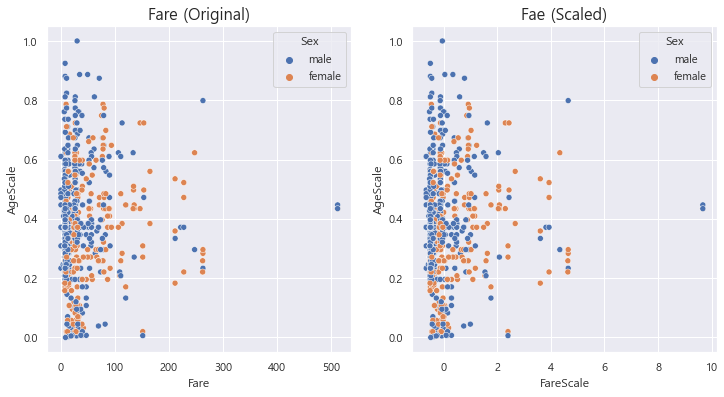

In [25]:
# 표준화 전, 후 Fare 변수와 FareScale 변수의 산점도 비교
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
scatter_plot = sns.scatterplot(x='Fare', y='AgeScale', hue = 'Sex', data=train)
plt.title('Fare (Original)', fontsize=16)

plt.subplot(1,2,2)
scatter_plot = sns.scatterplot(x='FareScale',y='AgeScale', hue='Sex', data=train)
plt.title('Fae (Scaled)', fontsize=16)
plt.show()

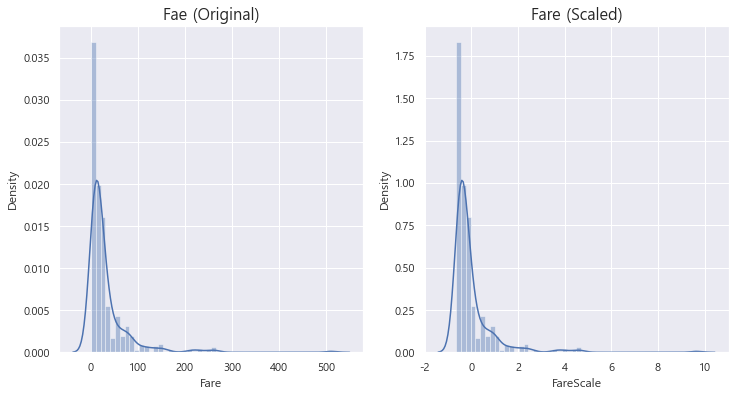

In [26]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
dis_plot = sns.distplot(train["Fare"], label='Fare')
plt.title('Fae (Original)', fontsize=16)

plt.subplot(1,2,2)

dis_plot = sns.distplot(train["FareScale"], label="FareScale")
plt.title('Fare (Scaled)', fontsize=16)
plt.show()